## Условие 1: Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

### 1.1. Скачать данные (недвижимость)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

In [3]:
data = df.groupby('price').agg({'price': 'count'}).rename(columns={'price': 'count'})
data = data.reset_index()

In [4]:
data

,price,count
0,75000.0,1
1,78000.0,1
2,80000.0,1
3,81000.0,1
4,82000.0,1
...,...,...
4023,5350000.0,1
4024,5570000.0,1
4025,6885000.0,1
4026,7062500.0,1


<AxesSubplot:xlabel='price', ylabel='Count'>

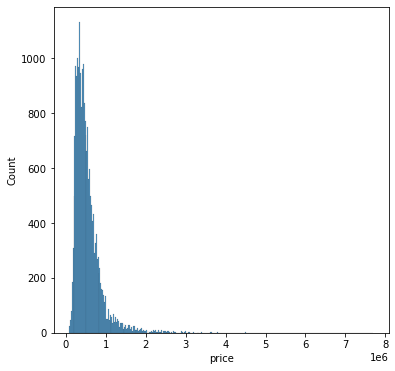

In [5]:
plt.figure(figsize=(6, 6))
sns.histplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='count'>

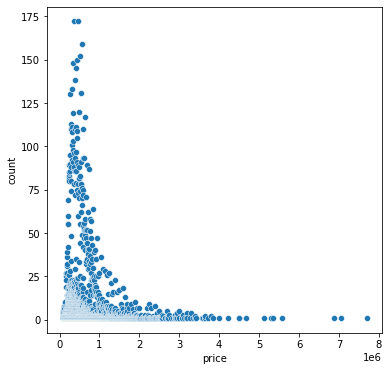

In [6]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x = data['price'], y = data['count'])

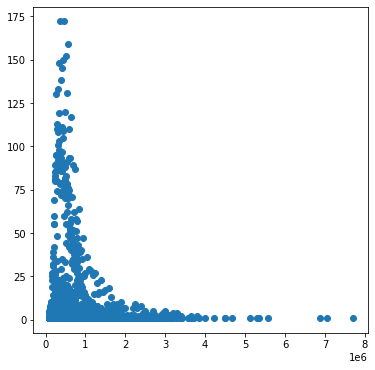

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(data['price'], data['count'])

Я думаю точечный график тут больше подойдет, но мне не нравится это распределение, я не понимаю почему он начинает от нуля, мне кажется график не верный, подскажите что тут не так?

### 1.3 Изучите распределение квадратуры жилой

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

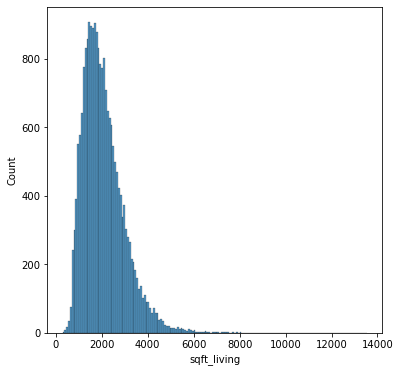

In [8]:
plt.figure(figsize=(6, 6))
sns.histplot(df['sqft_living'])

### 1.4 Изучите распределение года постройки

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

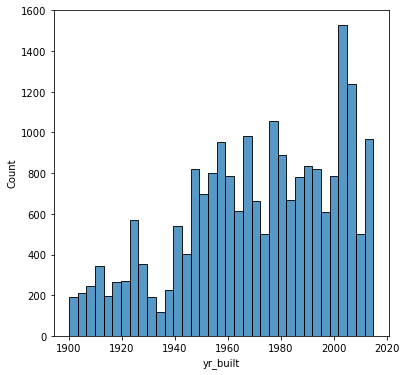

In [9]:
plt.figure(figsize=(6, 6))
sns.histplot(df['yr_built'])

## Условие 2: 2 задача
### 2.1 Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

In [10]:
data = df['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

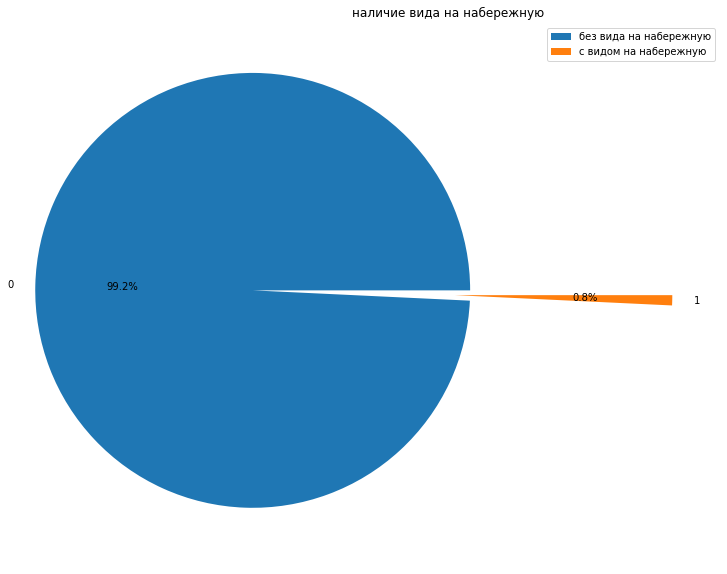

In [11]:
plt.figure(figsize=(10, 10))
expl = [0.9, 0.03]
plt.pie(data.values, autopct='%1.1f%%', labels=data.index, explode=expl)
plt.title('наличие вида на набережную')
plt.legend(['без вида на набережную', 'с видом на набережную']);

### 2.2 Изучите распределение этажей домов

<AxesSubplot:xlabel='floors', ylabel='Count'>

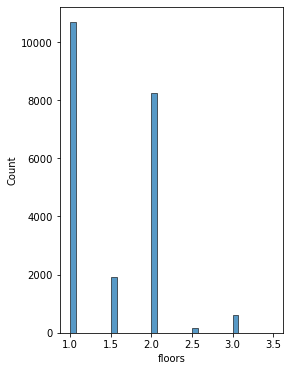

In [12]:
plt.figure(figsize=(4, 6))
sns.histplot(df['floors'])

### 2.3 Изучите распределение состояния домов

<AxesSubplot:xlabel='condition', ylabel='Count'>

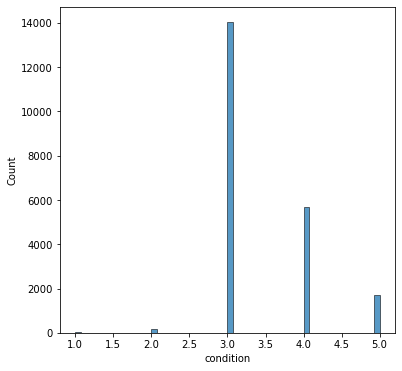

In [13]:
plt.figure(figsize=(6, 6))
sns.histplot(df['condition'])

## Условие 3: 3 задача
### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

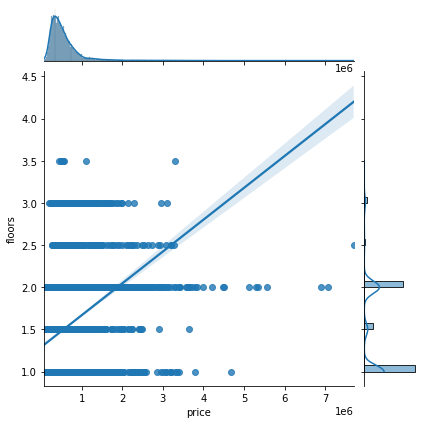

In [14]:
sns.jointplot(x=df.price, y=df.floors, kind='reg')

из графика видно что наибольшую цену имеют дома от 2 до 2.5 этажей

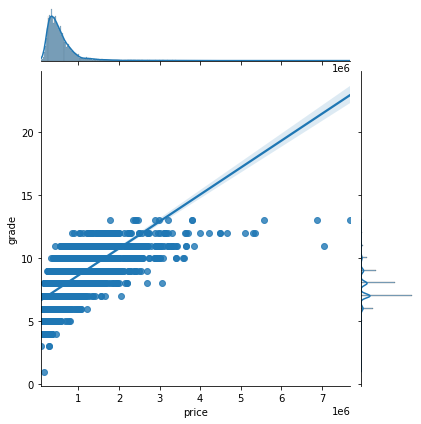

In [15]:
sns.jointplot(x=df.price, y=df.grade, kind='reg')

в классе дома же, видно восходящий тренд в зависимости от повышения класса дома, чем выше тем дороже

<AxesSubplot:xlabel='price', ylabel='view'>

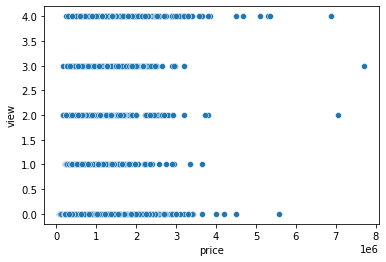

In [16]:
sns.scatterplot(x=df.price, y=df.view)

в данном критерии же мы видим что независимо от качества вида (я так понимаю вида из окна) дома цена не особо зависит так как мы имеем большее количество ценообразования на разных уровня градации этого критерия, построим другой график

<AxesSubplot:xlabel='price', ylabel='view'>

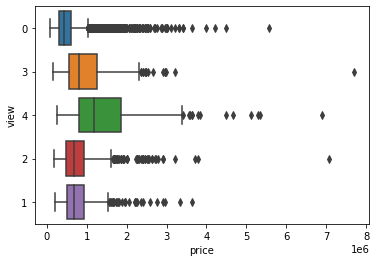

In [17]:
sns.boxplot(x=df.price, y=df.view.astype('str'), whis=1.5)

In [18]:
df.view.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [19]:
data_price = df.groupby('view').agg({'price': 'mean'}).rename(columns={'price': 'mean_price'})
data_price = round(data_price.reset_index())
data_price

,view,mean_price
0,0,496564.0
1,1,812281.0
2,2,792401.0
3,3,971965.0
4,4,1463711.0


Если взглянуть на график с усами и сравнить с колличеством домов разных категорий этого критерия, все равно я считаю нельзя явно сказать где цена выше, так как выбросов у всех категорий от 0 до 3 выше чем у 4ого категория у которго ценообразование явно выше чем у остальных, но если все же сравнивать по средней стоимости, то различия в цене становятся более очевидными

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

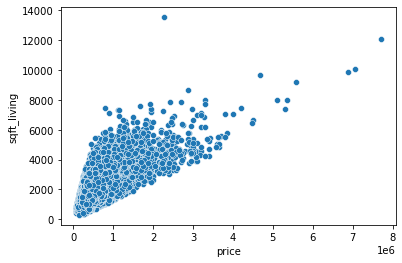

In [20]:
sns.scatterplot(x=df.price, y=df.sqft_living)

разумеется самый основной критерий, жилая площадь, здесь прослеживается восходящий тренд, где выше площадь там выше и цена, но это не самый явный фактор, судя по кучности видно что этот критерий нужно рассматривать в совокупности с другими критериями чтобы получить явную оценку

<AxesSubplot:xlabel='price', ylabel='sqft_lot'>

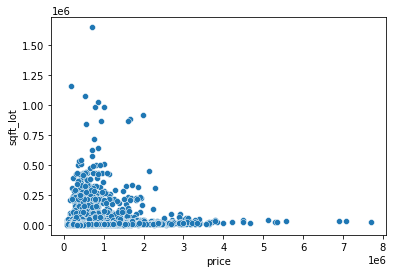

In [21]:
sns.scatterplot(x=df.price, y=df.sqft_lot)

К сожалению это опять не тот график который мне бы хотелось видеть, по оси у какие-то не понятные значения, и сами распределения явно не верные, хотя возможно я ошибаюсь

<AxesSubplot:xlabel='price', ylabel='condition'>

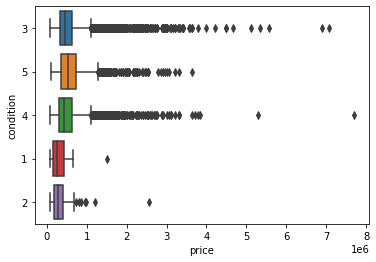

In [25]:
sns.boxplot(x=df.price, y=df.condition.astype('str'), whis=1.5)